In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/heart_disease.csv')
df.shape

(303, 15)

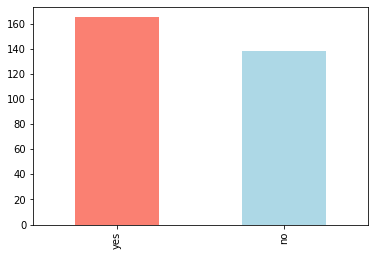

In [3]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [5]:
#Missing value 
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [6]:
#Describe data
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


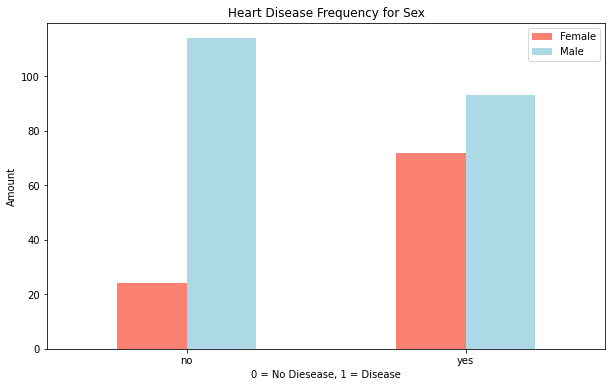

In [7]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Diesease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [8]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [9]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

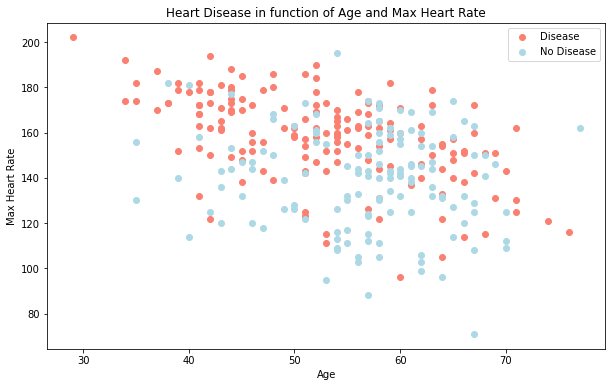

In [10]:
#Age vs. Max Heart Rate for Heart Disease
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.loc[df['target']=='yes', 'age'],
            df.loc[df['target']=='yes', 'thalach'],
            c='salmon')


# Scatter with negative examples
plt.scatter(df.loc[df['target']=='no', 'age'],
            df.loc[df['target']=='no', 'thalach'],
            c='lightblue')

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

(13.5, -0.5)

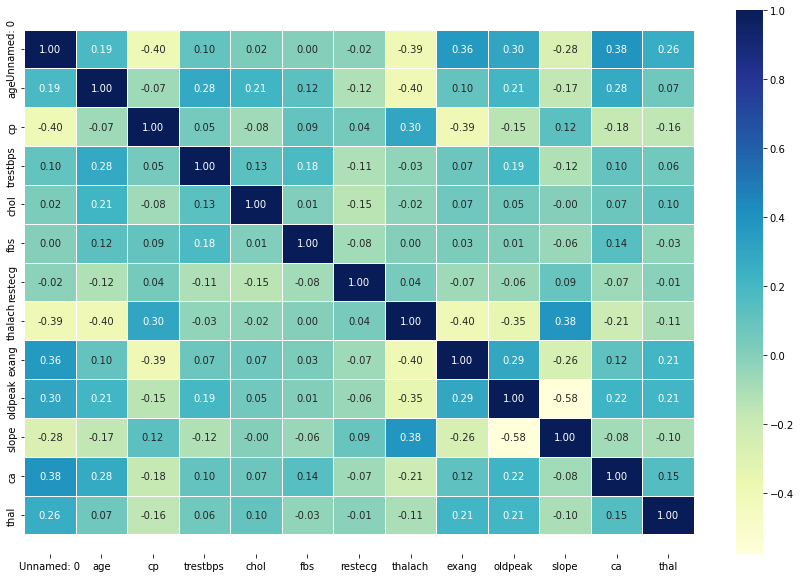

In [11]:
# correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
# Split data into X and y
X = df.drop(['Unnamed: 0', 'target', 'sex'], axis=1).dropna()
y = df.dropna()['target']

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [13]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [14]:
df.head(1)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [15]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7796610169491526,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.7966101694915254}

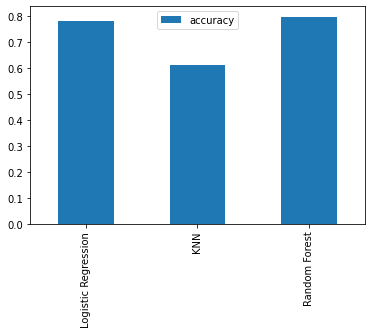

In [16]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [17]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [18]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6271186440677966,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

Maximum KNN score on the test data: 72.88%


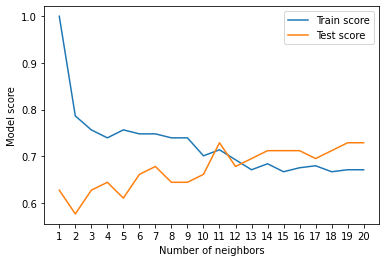

In [19]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

In [20]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [21]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [22]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7457627118644068